Read File   

In [45]:

import pandas as pd
file = "./data/Results.csv"

# Read the data into a data frame
df = pd.read_csv(file, sep=';')
# Remove the last column
df = df.iloc[:, :-1]
df = df.groupby(['Kind', 'File Size']).mean().reset_index()
df['File Size'] = (df['File Size']/1000000)
df['Encoding Size'] = (df['Encoding Size']/1000000)

dfSeq = df[df['Kind'] == 'Sequential'].reset_index(drop=True)
dfTP = df[df['Kind'] == 'ThreadPool'].reset_index(drop=True)
dfFF = df[df['Kind'] == 'FastFlow'].reset_index(drop=True)

dfTP['TPSpeedup'] = dfSeq['Total'] / dfTP['Total']
dfFF['FFSpeedup'] = dfSeq['Total'] / dfFF['Total']
dfTP['TPSpeedupC'] = dfSeq['Computation'] / dfTP['Computation']
dfFF['FFSpeedupC'] = dfSeq['Computation'] / dfFF['Computation']

# Absolute values
dfTP['TPSpeedup'] = dfTP['TPSpeedup'].to_numpy().astype('int64')
dfFF['FFSpeedup'] = dfFF['FFSpeedup'].to_numpy().astype('int64')
dfTP['TPSpeedupC'] = dfTP['TPSpeedupC'].to_numpy().astype('int64')
dfFF['FFSpeedupC'] = dfFF['FFSpeedupC'].to_numpy().astype('int64')
dfTP['IO'] = dfTP['Total'] - dfTP['Computation']
dfFF['IO'] = dfFF['Total'] - dfFF['Computation']
# print(dfTP)
# print(dfFF)
dfTP = dfTP.groupby(['Kind', 'File Size']).mean().reset_index()
dfFF = dfFF.groupby(['Kind', 'File Size']).mean().reset_index()
df = df.groupby(['Kind', 'File Size']).mean().reset_index()
df['Total'] = (df['Total']).astype('int64')
# If 0 then 1
dfFF['FFSpeedup'] = dfFF['FFSpeedup'].replace(0, 1)
dfTP['TPSpeedup'] = dfTP['TPSpeedup'].replace(0, 1)
dfFF['FFSpeedupC'] = dfFF['FFSpeedupC'].replace(0, 1)
dfTP['TPSpeedupC'] = dfTP['TPSpeedupC'].replace(0, 1)

# print(dfTP)
print(dfFF)


       Kind   File Size  Encoding Size    Nw   Tasks       Total  Computation  \
0  FastFlow     2.10592       1.119761   1.0     1.0    106935.7     103779.7   
1  FastFlow    10.52960       5.598801   4.0    32.0    143484.0     128050.3   
2  FastFlow    52.64800      27.994001  16.0    32.0    334349.2     256682.6   
3  FastFlow   210.59200     111.976001  32.0   128.0    940870.2     610301.2   
4  FastFlow  1052.96000     559.880001  32.0   512.0   4220920.2    2632462.5   
5  FastFlow  2105.92000    1119.760001  32.0  1024.0   8175603.6    4975311.3   
6  FastFlow  4211.84000    2239.520001  32.0  2048.0  16221868.8    9917201.1   
7  FastFlow  8423.68000    4980.640001  32.0  4096.0  34174531.1   20741612.2   

   FFSpeedup  FFSpeedupC          IO  
0        1.0         1.0      3156.0  
1        3.0         3.0     15433.7  
2        6.0         8.0     77666.6  
3        9.0        14.0    330569.0  
4       10.0        16.0   1588457.7  
5       10.0        17.0   3200292.3

/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_58720/3897757731.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Kind', 'File Size']).mean().reset_index()


Plot difference between FastFlow and Sequential

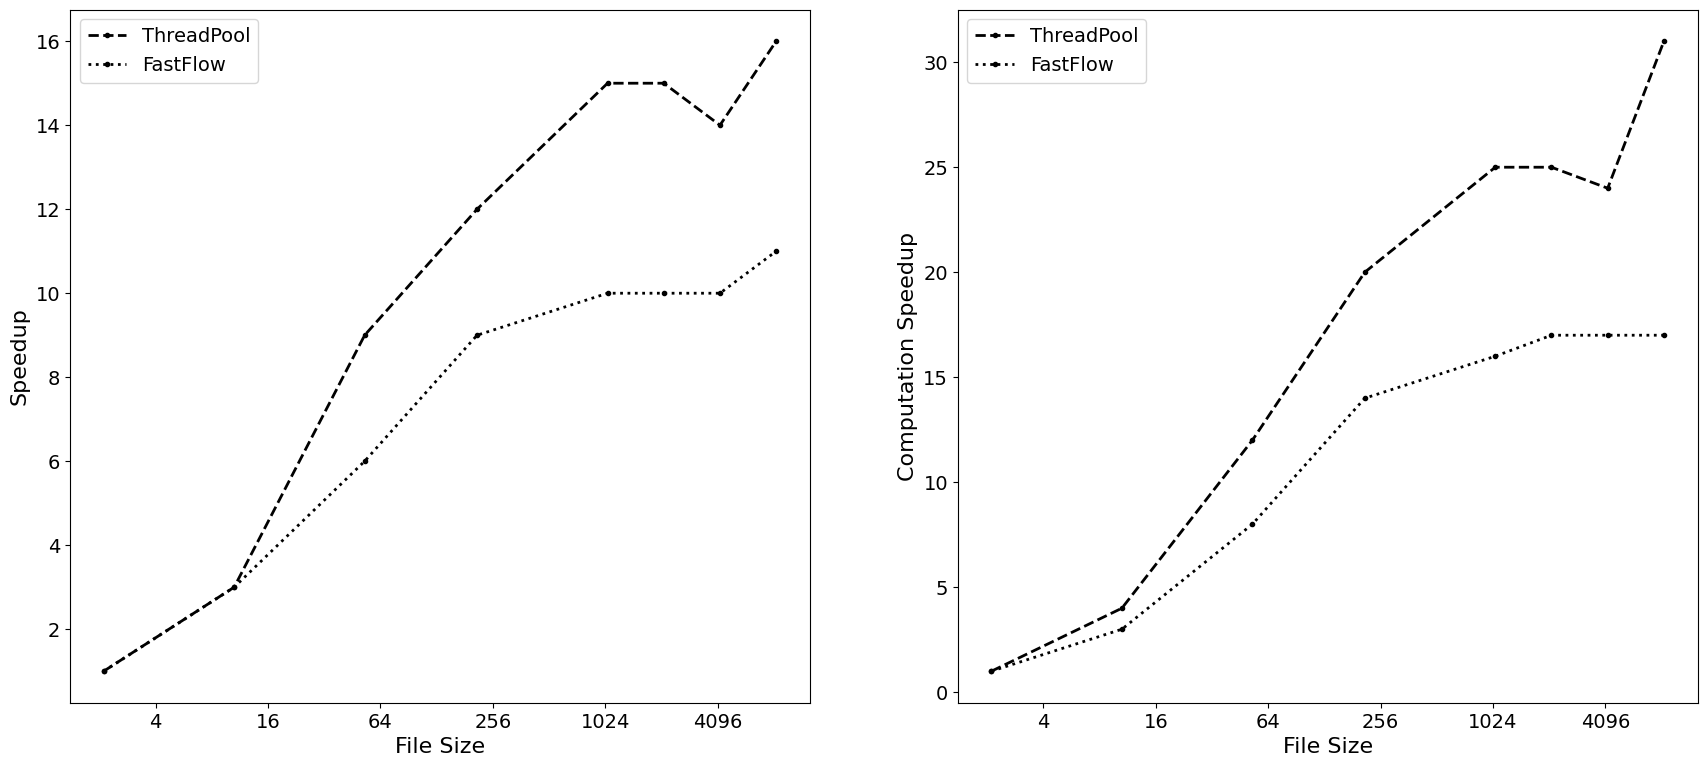

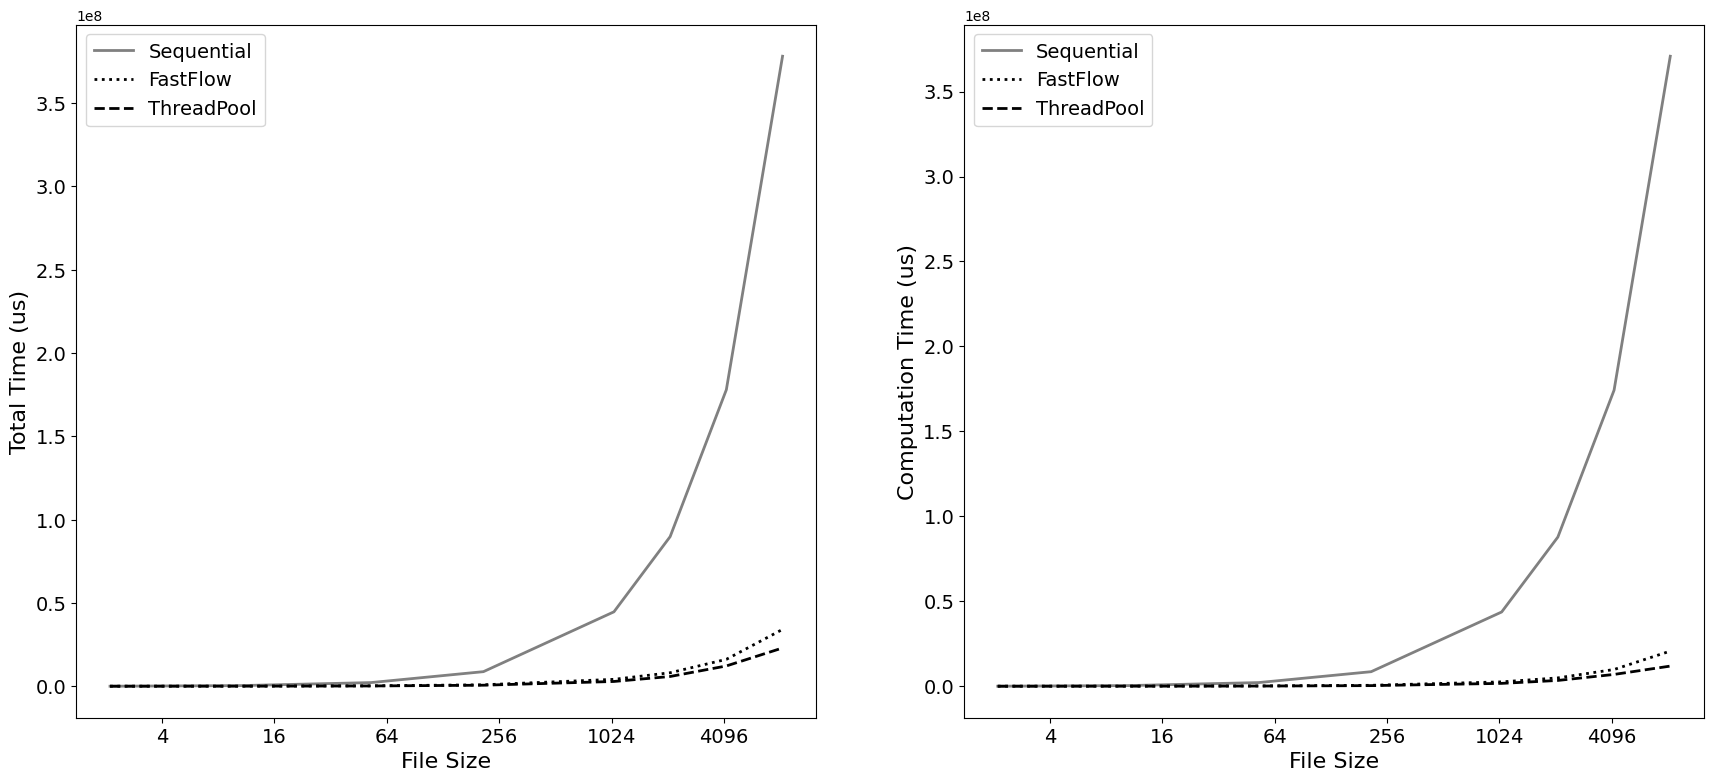

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter


def plotTotal(title, filename):
    # Plot
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(21, 9))
    # fig.suptitle(title)
    ax0.set_xlabel("File Size", color='black', fontsize=16)
    ax1.set_xlabel("File Size", color='black', fontsize=16)
    ax0.set_ylabel("Total Time (us)", color='black', fontsize=16)
    ax1.set_ylabel("Computation Time (us)", color='black', fontsize=16)
    
    # Plot
    ax0.plot(dfSeq['File Size'], dfSeq['Total'], label='Sequential', color='gray', linestyle='solid', linewidth=2)
    ax0.plot(dfFF['File Size'], dfFF['Total'], label='FastFlow', color='black', linestyle='dotted', linewidth=2)
    ax0.plot(dfTP['File Size'], dfTP['Total'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2)
    ax1.plot(dfSeq['File Size'], dfSeq['Computation'], label='Sequential', color='gray', linestyle='solid', linewidth=2)
    ax1.plot(dfFF['File Size'], dfFF['Computation'], label='FastFlow', color='black', linestyle='dotted', linewidth=2)
    ax1.plot(dfTP['File Size'], dfTP['Computation'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2)

    # Legend
    ax0.legend(fontsize=14)
    ax1.legend(fontsize=14)
    ax1.set_xscale('log', base=2)
    # ax1.set_yscale('log', base=2)
    ax0.set_xscale('log', base=2)
    # ax0.set_yscale('log', base=2)
    for axis in [ax1.xaxis, ax1.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    for axis in [ax0.xaxis, ax0.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    # Tick size
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    # Save
    fig.savefig(filename, bbox_inches='tight')
    
def plotSpeedup(title, filename):
    # Plot
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(21, 9))
    # fig.suptitle(title)
    ax0.set_xlabel("File Size", color='black', fontsize=16)
    ax1.set_xlabel("File Size", color='black', fontsize=16)
    ax0.set_ylabel("Speedup", color='black', fontsize=16)
    ax1.set_ylabel("Computation Speedup", color='black', fontsize=16)

    # Plot
    ax0.plot(dfTP['File Size'], dfTP['TPSpeedup'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
    ax0.plot(dfFF['File Size'], dfFF['FFSpeedup'], label='FastFlow', color='black', linestyle='dotted', linewidth=2, marker='.')
    ax1.plot(dfTP['File Size'], dfTP['TPSpeedupC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
    ax1.plot(dfFF['File Size'], dfFF['FFSpeedupC'], label='FastFlow', color='black', linestyle='dotted', linewidth=2, marker='.')

    # Legend
    ax0.legend(fontsize=14, loc='upper left')
    ax1.legend(fontsize=14, loc='upper left')
    # Ticks
    ax1.set_xscale('log', base=2)
    ax0.set_xscale('log', base=2)
    # ax1.set_yscale('log')
    # ax0.set_yscale('log')
    for axis in [ax1.xaxis, ax1.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    for axis in [ax0.xaxis, ax0.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    # Tick size
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    # Save
    fig.savefig(filename, bbox_inches='tight')
    
def plotIO(title, filename):
    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_xlabel("File Size")
    ax.set_ylabel("Speedup")

    # Plot
    ax.plot(dfTP['File Size'], dfTP['IO'], label='ThreadPool IO')
    ax.plot(dfFF['File Size'], dfFF['IO'], label='FastFlow IO')

    # Legend
    ax.legend()
    ax.set_yscale('log')

    # Save
    fig.savefig(filename, bbox_inches='tight')
    # fig.show()
    
plotSpeedup("Speedup", "plots/speedup.png")
plotTotal("Times", "plots/TOTAL.png")
# plotIO("IO", "plots/IO.png")